In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sys,os
import random
path = os.getcwd()

In [5]:
df = pd.read_csv("mHealth_subject3.log", header=None, delim_whitespace=True)

In [6]:
def randomString(stringLength=10):
    import string
    """Generate a random string of fixed length """
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

In [25]:
# rps : readingsPerSample
def exportFigs(input_filename="mHealth_subject3.log",rps=50,figsize=(5,5),output_folderName="",prefex="fig", activities = range(1,12)):
    os.chdir(path)
    
    df = pd.read_csv(filename, header=None, delim_whitespace=True)
    df = df[df[23]!=0] #drop 0 labeled features
    features_df = df[3]
    targets_df = df[23]
    
    #normalization
    features_np = features_df.values
    features_np_normalized = (features_np-min(features_np))/(max(features_np)-min(features_np))
    features_df_normalized = pd.DataFrame(features_np_normalized)
    
    #segmentation
    targets_dummy  = np.array([])
    features_dummy  = np.array([])
    for i in range(int(features_df_normalized.shape[0]/rps)):
        if  targets_df[i*rps:i*rps+rps].mean() in activities:
            features_dummy=np.append(features_dummy,features_df_normalized[i*rps:i*rps+rps])
            targets_dummy=np.append(targets_dummy,targets_df[i*rps:i*rps+rps].mean()-1)

    features_dummy=features_dummy.reshape(-1,rps)
    
    #folders hiararchy
    if folderName == "":
        folderName=randomString(10)
        
    os.chdir(path)
    try :
        os.makedirs(folderName)
    except:
        pass
    path_str = str(path) +"\\"+ folderName
    os.chdir(path_str)
    
    tmp=1
    imageCounter=1
    for i in range(1,len(targets_dummy)) :
        if int(targets_dummy[i]+1) != tmp:
            imageCounter = 0
            tmp=int(targets_dummy[i]+1)
        imageCounter+=1
        plt.figure(figsize=figsize)
        plt.xticks([])
        plt.yticks([])
        plt.rc("figure", facecolor="white")
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
        plt.plot(features_dummy[i], color='k')
        label=str(int(targets_dummy[i]+1))
        print(label+"_fig_"+str(imageCounter)+".png")
        plt.savefig(label+"_fig_"+str(imageCounter)+".png")
        plt.clf()
        plt.cla()
        plt.close()
    os.chdir(path)
    

In [26]:
exportFigs(input_filename=output_folderName="test_100_n",figsize=(10,5),rps=100,activities=range(9,13))

9_fig_1.png
9_fig_2.png
9_fig_3.png
9_fig_4.png
9_fig_5.png
9_fig_6.png
9_fig_7.png
9_fig_8.png
9_fig_9.png
9_fig_10.png
9_fig_11.png
9_fig_12.png
9_fig_13.png
9_fig_14.png
9_fig_15.png
9_fig_16.png
9_fig_17.png
9_fig_18.png
9_fig_19.png
9_fig_20.png
9_fig_21.png
9_fig_22.png
9_fig_23.png
9_fig_24.png
9_fig_25.png
9_fig_26.png
9_fig_27.png
9_fig_28.png
9_fig_29.png
10_fig_1.png
10_fig_2.png
10_fig_3.png
10_fig_4.png
10_fig_5.png
10_fig_6.png
10_fig_7.png
10_fig_8.png
10_fig_9.png
10_fig_10.png
10_fig_11.png
10_fig_12.png
10_fig_13.png
10_fig_14.png
10_fig_15.png
10_fig_16.png
10_fig_17.png
10_fig_18.png
10_fig_19.png
10_fig_20.png
10_fig_21.png
10_fig_22.png
10_fig_23.png
10_fig_24.png
10_fig_25.png
10_fig_26.png
10_fig_27.png
10_fig_28.png
10_fig_29.png
10_fig_30.png
11_fig_1.png
11_fig_2.png
11_fig_3.png
11_fig_4.png
11_fig_5.png
11_fig_6.png
11_fig_7.png
11_fig_8.png
11_fig_9.png
11_fig_10.png
11_fig_11.png
11_fig_12.png
11_fig_13.png
11_fig_14.png
11_fig_15.png
11_fig_16.png
11_fig

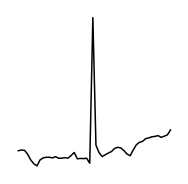

In [33]:
features_df = df[3]
targets_df = df[23]
Activities = range(1,12)
rps=50
#normalization
features_np = features_df.values
features_np_normalized = (features_np-min(features_np))/(max(features_np)-min(features_np))
features_df_normalized = pd.DataFrame(features_np_normalized)

#segmentation
targets_dummy  = np.array([])
features_dummy  = np.array([])
for i in range(int(features_df_normalized.shape[0]/rps)):
    if  targets_df[i*rps:i*rps+rps].mean() in Activities:
        features_dummy=np.append(features_dummy,features_df_normalized[i*rps:i*rps+rps])
        targets_dummy=np.append(targets_dummy,targets_df[i*rps:i*rps+rps].mean()-1)

features_dummy=features_dummy.reshape(-1,rps)

folderName=randomString(10)
os.chdir(path)
try :
    os.makedirs(folderName)
except:
    pass
path_str = str(path) +"\\"+ folderName
os.chdir(path_str)

plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.rc("figure", facecolor="white")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.plot(features_dummy[1], color='k')
plt.savefig("test1.png")
os.chdir(path)

array([0.46646404, 0.45752225, 0.45007031, 0.44224635, 0.44522695,
       0.4560324 , 0.46385635, 0.46460128, 0.46832681, 0.46646404,
       0.46981755, 0.46646404, 0.46646404, 0.46534621, 0.46348345,
       0.46311054, 0.46571912, 0.47317017, 0.46981755, 0.46348345,
       0.46460128, 0.46199359, 0.44634478, 0.57264863, 0.6751068 ,
       0.45864009, 0.46050285, 0.45677732, 0.45975792, 0.46311054,
       0.46683695, 0.46944464, 0.47056248, 0.46385635, 0.45864009,
       0.45752225, 0.46273852, 0.47689658, 0.49030916, 0.49291723,
       0.49738813, 0.50334906, 0.50595764, 0.50707547, 0.51005607,
       0.51303667, 0.51564436, 0.52197846, 0.52495906, 0.53203809])

In [243]:
features = df[3]
targets = df[23]

#normalization
features_np = features.values
features_normalized = (features_np-min(features_np))/(max(features_np)-min(features_np))

df_normalized = pd.DataFrame(features_normalized)
df_normalized.head()

,0
0,0.466464
1,0.457522
2,0.450070
3,0.442246
4,0.445227


In [149]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [150]:
scaled_data[0]

array([ 0.30775952, -0.06928743, -0.54193917])

In [152]:
d = df[df[2]!=0]

In [72]:
X = d[[0,1]]
Y = d[2]

In [73]:
def getFeatures(datasets,readingsPerSample=50):
    Activities = range(1,12)
    targets  = np.array([])
    feature_set= np.array([])
    for df in datasets:
        for i in range(int(df.shape[0]/readingsPerSample)):
            if df[2][i*readingsPerSample:i*readingsPerSample+readingsPerSample].mean() in Activities:
                feature_set=np.append(feature_set,[df[1][i*readingsPerSample:i*readingsPerSample+readingsPerSample]])
                targets=np.append(targets,df[2][i*readingsPerSample:i*readingsPerSample+readingsPerSample].mean()-1)
    feature_set=feature_set.reshape(int(feature_set.shape[0]/readingsPerSample),readingsPerSample)
#     one_hot_labels=one_hot_labels.reshape(int(one_hot_labels.shape[0]/12),12)
    return feature_set, targets
def unison_shuffled_copies(a, b,seed=1):
    assert len(a) == len(b)
    np.random.seed(seed)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [160]:
x=d[0]
x_np=x.values

In [167]:
x_normalized = (x_np-min(x_np))/(max(x_np)-min(x_np))
x_reshaped = x_normalized[:35350].reshape(-1,50)

In [171]:
x_reshaped.shape
y.shape

(676,)

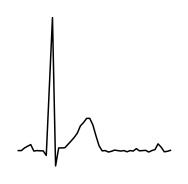

In [204]:
plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.rc("figure", facecolor="white")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.plot(np.log(x_reshaped[98]+1), color='k')
plt.savefig("test1.png")

In [129]:
b

array([[1, 1, 1],
       [2, 3, 4]])

In [32]:
c = np.concatenate((a, b))
c

array([[1, 2, 3],
       [4, 5, 6],
       [1, 1, 1],
       [2, 3, 4]])

In [31]:
c[1]

array([4, 5, 6])